# Importing Data

In [1520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotnine import *
from plotnine.data import *
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")




In [1521]:
PATH = "Data/Titanic/"

In [1522]:
!ls {PATH}

gender_submission.csv test.csv
sub1.csv              train.csv


In [1523]:
!head Data/Titanic/train.csv

In [1524]:
df_raw_train = pd.read_csv(f'{PATH}train.csv' , low_memory=False)
df_raw_test = pd.read_csv(f'{PATH}test.csv', low_memory=False)



In [1525]:
def display_all(df):
    with pd.option_context("display.max_rows",200):
     with pd.option_context("display.max_columns",200):
        display(df)
 

In [1526]:
display_all(df_raw_train.tail().transpose())

,886,887,888,889,890
PassengerId,887,888,889,890,891
Survived,0,1,0,1,0
Pclass,2,1,3,1,3
Name,"Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,male,male
Age,27,19,NaN,26,32
SibSp,0,0,1,0,0
Parch,0,0,2,0,0
Ticket,211536,112053,W./C. 6607,111369,370376
Fare,13,30,23.45,30,7.75


# Handling Missing Data

### Checking missing data

In [1527]:
# Making full Data
full_data = pd.concat([df_raw_train,df_raw_test],ignore_index=False)
# Fill empty and NaN values with NaN
full_data.fillna(np.nan)
def find_na(df):
    import missingno as msno
    na_percent=pd.DataFrame()
    na_percent["num_na"] = df.isnull().sum()
    na_percent["percent"] = df.apply(lambda x:x.isnull().sum()/len(df))
    display(na_percent)
    msno.matrix(df)
    
    

In [1528]:
full_data.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


,num_na,percent
Age,263,0.200917
Cabin,1014,0.774637
Embarked,2,0.001528
Fare,1,0.000764
Name,0,0.000000
Parch,0,0.000000
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


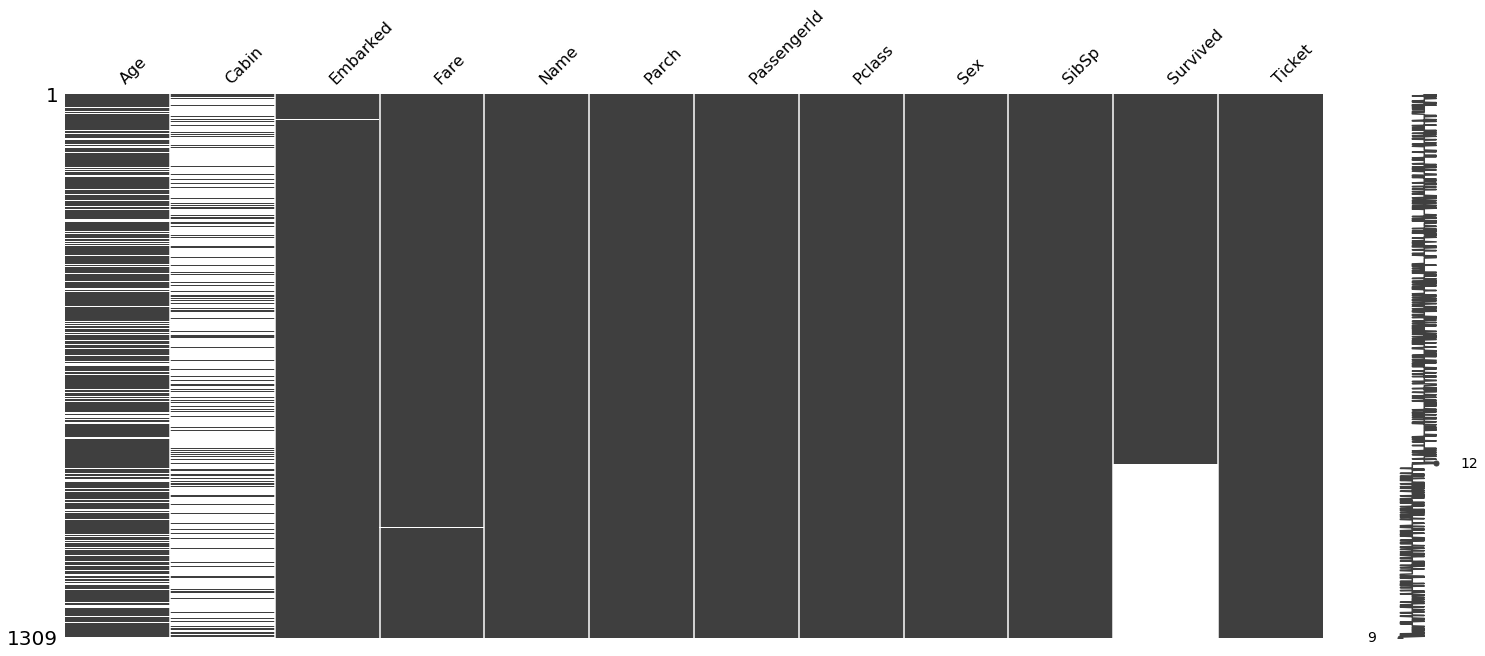

In [1529]:

find_na(full_data)

In [1530]:
full_data.info()
full_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


### Dealing with Embarked missing values!

In [1531]:
full_data[full_data["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


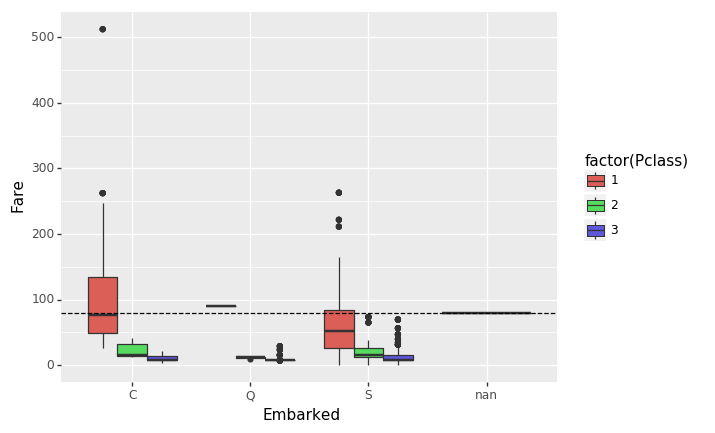

<ggplot: (7566472982)>

In [1532]:
( ggplot(full_data, aes("Embarked","Fare",fill="factor(Pclass)"))+ geom_boxplot() + geom_hline(aes(yintercept =80),linetype="dashed") )

As we see Fare of 80 $ perfectly matched with Pclass of 1 in C sector, we will replace NA values by C.

In [1533]:
full_data.loc[full_data["PassengerId"].isin( ["62","830"]),"Embarked"] = "C"

In [1534]:
### Dealing with Fare missing value!

In [1535]:
full_data[full_data["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [1536]:
full_data['Fare'].fillna(full_data.groupby('Sex')['Age'].transform("mean"), inplace=True)

### Dealing with Age missing values!

In [1537]:
full_data[full_data["Age"].isnull()].shape

(263, 12)

In [1538]:
#!pip install fancyimpute

from fancyimpute import IterativeImputer
df_impute=full_data[["Pclass","Fare","Parch","Age"]]
#fancy impute removes column names.
train_cols = list(df_impute)
# Use IterativeImputer to fill in each row's missing features
train = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(df_impute))
train.columns = train_cols

In [1539]:
full_data["Age"]=train["Age"]

### Dealing with Cabin missing values!

Because there are lots of NaNs in cabin variables I decided to not include it in analysis

In [1540]:
full_data.drop(["Cabin"],axis=1,inplace=True)

## Outlier Detection!

In [1541]:
full_data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.059997,33.293409,0.385027,655.000000,2.294882,0.498854,0.383838
std,13.158425,51.738933,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,26.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,36.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


From the describing table it seems that in Fare and Parch and SipSp we have some outliers, so we plot their boxplot 

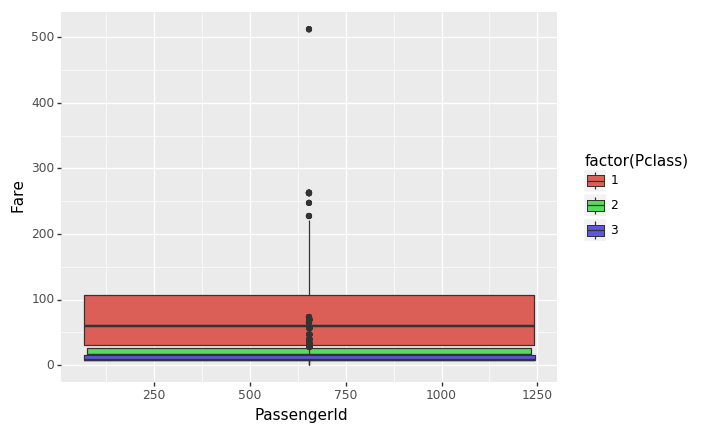

<ggplot: (7566643695)>

In [1542]:
( ggplot(full_data, aes(y="Fare", x="PassengerId" ,fill= "factor(Pclass)"))+ geom_boxplot())

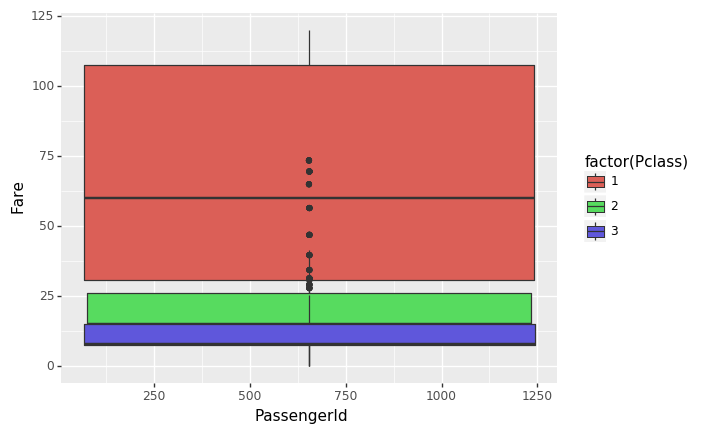

<ggplot: (-9223372029288214293)>

In [1543]:
# by gut feeling I decided to cap data with 120 $
full_data["Fare"].loc[full_data["Fare"] >= 120]=120
( ggplot(full_data, aes(y="Fare", x="PassengerId" ,fill= "factor(Pclass)"))+ geom_boxplot())

### Lets see relation between Sex and being Survived

In [1544]:
df_raw[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


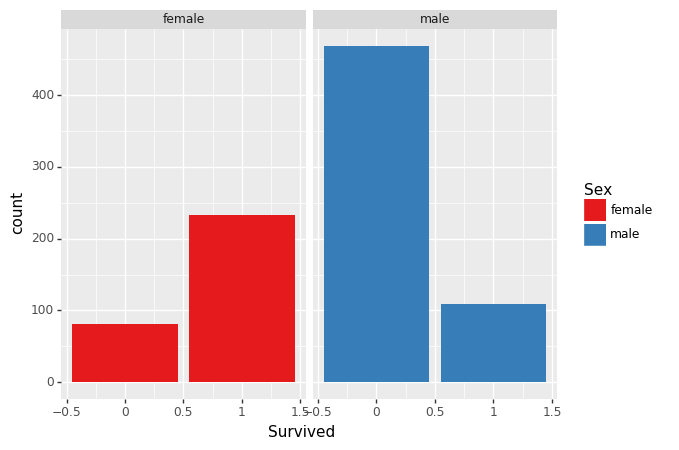

<ggplot: (-9223372029291607762)>

In [1545]:
ggplot(df_raw[["Sex","Survived"]], aes("Survived",fill="Sex"))+ geom_bar() + facet_wrap(["Sex"])+ scale_fill_brewer(type="qual",palette=6)

### Lets see relation between Pclass and being Survived

In [1546]:
df_raw[["Pclass","Survived"]].groupby(["Pclass"]).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


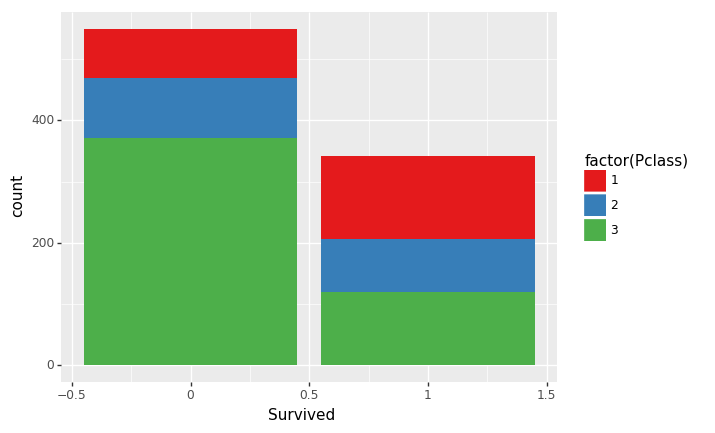

<ggplot: (7586144225)>

In [1547]:
ggplot(df_raw[["Pclass","Survived"]], aes("Survived",fill="factor(Pclass)"))+ geom_bar()+ scale_fill_brewer(type="qual",palette=6)

In [1548]:
## Mapping Sex categorical data
full_data["Sex"]=full_data["Sex"].map( {"female": 0 , "male" : 1})




In [1549]:
full_data["Sex"].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [1550]:
## one hot encoding of Embarked 
Embarked_dummies = pd.get_dummies(full_data["Embarked"])

full_data =pd.concat([full_data, Embarked_dummies],axis=1)


#### PassengerId and Name and Ticket are redundant in prediction


In [1551]:
# PassengerId and Name and Ticket are redundant in prediction

full_data.drop(["Name","Ticket","PassengerId","Embarked"],axis=1,inplace=True)

In [1552]:
full_data.shape

(1309, 10)

### Spliting full_data to train and test

In [1553]:
df_raw_train.shape

(891, 12)

In [1574]:
train = full_data[1:891 :]
test = full_data[891: :]

In [1575]:
train.shape

(890, 10)

In [1576]:
test.shape

(418, 10)

In [1577]:
y = train["Survived"]
X = train.drop(["Survived"],axis=1)
ytest = test["Survived"]
Xtest = test.drop(["Survived"],axis=1)

### Implementation of different classifiers : This section is totally driven by Sina's kernel : https://www.kaggle.com/sinakhorami/titanic-best-working-classifier

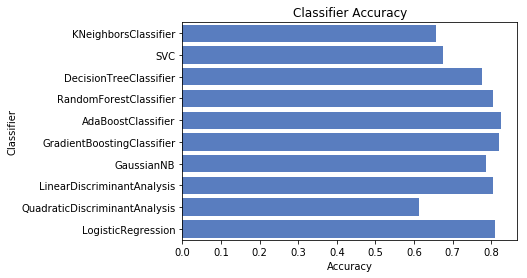

In [1578]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()] 

"""classifiers = [

    RandomForestClassifier(),
] """
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)




acc_dict = {}

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] 
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

## Prediction with test set

In [1579]:
log.sort_values('Accuracy',ascending=False)

,Classifier,Accuracy
0,AdaBoostClassifier,0.825843
0,GradientBoostingClassifier,0.820225
0,LogisticRegression,0.808989
0,RandomForestClassifier,0.803371
0,LinearDiscriminantAnalysis,0.803371
0,GaussianNB,0.786517
0,DecisionTreeClassifier,0.775281
0,SVC,0.674157
0,KNeighborsClassifier,0.657303
0,QuadraticDiscriminantAnalysis,0.612360


In [1600]:
best_classifier = LinearDiscriminantAnalysis()
best_classifier.fit(X, y)
result = best_classifier.predict(Xtest)
result = result.astype(int)

In [1601]:
Xtest.shape

(418, 9)

In [1602]:

gender_submission= pd.DataFrame({"PassengerId":df_raw_test['PassengerId'],"Survived": result})

In [1603]:
gender_submission.to_csv("Data/Titanic/sub1.csv",header=True,index=False)

In [1604]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [1615]:
second_classifier = RandomForestClassifier()
second_classifier.fit(X, y)
result_2= second_classifier.predict(Xtest)
result_2 = result_2.astype(int)

In [1616]:
gender_submission= pd.DataFrame({"PassengerId":df_raw_test['PassengerId'],"Survived": result_2})

In [1617]:
gender_submission.to_csv("Data/Titanic/sub2.csv",header=True,index=False)

In [1618]:
result_2

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,